In [31]:
import pystan
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np#
import seaborn as sns

In [10]:
%matplotlib inline

In [5]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


In [7]:
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

 Funnel Model

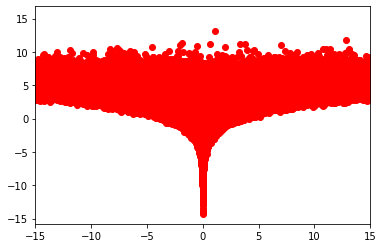

In [8]:
sim = 10**6
n = 10
v = np.random.normal(loc=0.0, scale=3.0, size=sim)
thetas = np.array([np.random.normal(loc=0.0, scale=np.exp(v/2)) for _ in range(n)])

plt.xlim(-15,15)
plt.plot(thetas[0], v, "ro")

In [11]:
data = {}

funnel_model = """
parameters {
  real y;
  vector[9] x;
}
model {
  y ~ normal(0, 3);
  x ~ normal(0, exp(y/2));
}
"""


sm = pystan.StanModel(model_code=funnel_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8cc274eacc00a7f0875c899c4e723397 NOW.


In [12]:
fit = sm.sampling(iter=1000, chains=4)

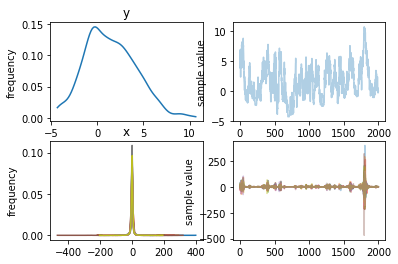

In [13]:
fit.plot()
fit_summary = fit.summary()

In [14]:
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'],
                  columns=summary_dict['summary_colnames'],
                  index=summary_dict['summary_rownames'])

In [15]:
sims = fit.extract()
ys = sims['y']
xs = sims['x'][:,0]

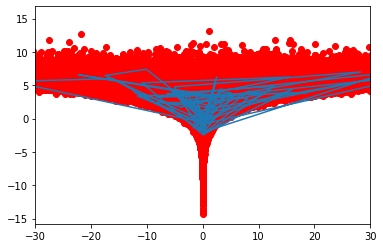

In [43]:
lim = 100
plt.xlim(-30,30)
plt.plot(thetas[0], v, "ro")
plt.plot(xs[:lim],ys[:lim])

(-15, 15)

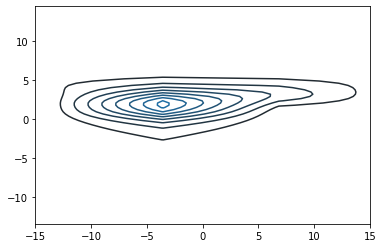

In [40]:
lim = 100000
ax = sns.kdeplot(thetas[0][:lim], v[:lim])
ax.set_xlim(-15,15)

(-15, 15)

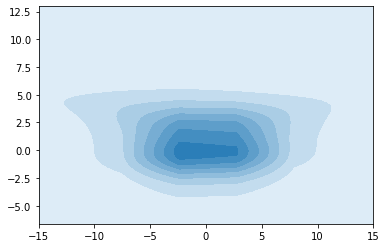

In [41]:
ax = sns.kdeplot(xs, ys, shade=True)
ax.set_xlim(-15,15)

Reparam

In [44]:
# re param
funnel_reparam = """
    parameters {
  real y_raw;
  vector[9] x_raw;
}
transformed parameters {
  real y;
  vector[9] x;

  y = 3.0 * y_raw;
  x = exp(y/2) * x_raw;
}
model {
  y_raw ~ std_normal(); // implies y ~ normal(0, 3)
  x_raw ~ std_normal(); // implies x ~ normal(0, exp(y/2))
}
"""

sm = pystan.StanModel(model_code=funnel_reparam)
fit = sm.sampling(iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_940b0c54e4b39f4384038f378fd8d79d NOW.


In [45]:
sims = fit.extract()
ys = sims['y']
xs = sims['x'][:,0]

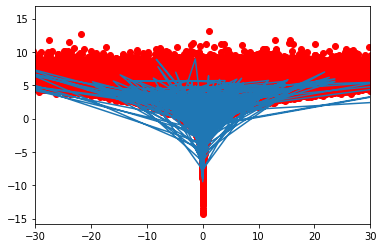

In [47]:
lim = 1000
plt.xlim(-30,30)
plt.plot(thetas[0], v, "ro")
plt.plot(xs[:lim],ys[:lim])